In [ ]:
import logging
import qcodes as qc

# Matplot plots
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore")

from qcodes.utils.dataset.doNd import plot as doNd_plot
from qcodes.logger import start_all_logging
from qcodes.parameters import Parameter
import numpy as np
from time import sleep

# qcodes imports 
from qcodes.dataset import (
    LinSweep,
    Measurement,
    dond,
    experiments,
    initialise_or_create_database_at,
    load_by_run_spec,
    load_or_create_experiment,
    plot_dataset,
    plot_by_id, 
    do1d
)

from cappy.balancer import Balancer
from cappy.config import TEST_STATION_CONFIG, qc_dbpath

# Live plotting with Plottr
import IPython.lib.backgroundjobs as bg
from plottr.apps import inspectr

import keyboard

In [2]:
## Qcodes logger
# log = logging.getLogger("balance_logger")
# from qcodes.logger import start_all_logging
# start_all_logging()

def paramp(param, final=0):
    points = np.linspace(param(), final, 50)
    for p in points:
        param(p)
        sleep(0.05)

In [3]:
# Global Constants
LIVE_PLOT = True
SAVE_DATA = True
EXP_NAME = "trans_conductance_11_22_24"
SAMPLE_NAME = "run_1"
INT_TIME = 2    # lockin integration time (PLEASE ADD UNITS)

## Balancing arguements
FREQ = 50000
DELTA = (150, 150)
INITIAL = (10, 10)
Cstand = 10  # nF
DRIVE = 300

# dac.close()
# li.close()
# yoko.close()
# keithley.close()

In [ ]:
station = qc.Station(config_file=str(TEST_STATION_CONFIG))

dac = station.load_instrument("acdac")
li = station.load_instrument("lockin")
yoko = station.load_instrument("yoko")
keithley = station.load_instrument("keithley")

# dac.display_mode('REMOTE')

Connected to: BARRERA ACDAC02 (serial:AD9106, firmware:2.00) in 3.06s
Connected to: Stanford_Research_Systems SR865A (serial:005296, firmware:V1.51) in 0.14s
Connected to: YOKOGAWA 765611 (serial:90ZC43353, firmware:1.10) in 0.03s
Connected to: KEITHLEY INSTRUMENTS DMM6500 (serial:04608216, firmware:1.7.12b) in 0.02s


In [6]:
dac.ch4.voltage(400)
dac.frequency(10000)
dac.display_mode("NORMAL")

vdd = yoko.channel1.voltage
vdd.label = "vdd"

vg = yoko.channel2.voltage

idd = yoko.channel1.current
ig = yoko.channel2.current
vds = keithley.amplitude

In [7]:
vdd(0.1)
dac.ch1.voltage(100)
dac.ch2.voltage(0)

# ramp(vdd)

In [8]:
# Setup qcodes database
initialise_or_create_database_at(qc_dbpath)

# Initialize Experiment
balance_exp = load_or_create_experiment(
    experiment_name=EXP_NAME,
    sample_name=SAMPLE_NAME
)

# Run Experiment

In [9]:
#Start amd stop set the min and max Vg which we sweep (in V)

START = 0 
STOP = -0.7
SAMPLES = 300
INT_TIME = 0.3

dac.display_mode("REMOTE")


def setup():
    pass
def teardown():
    pass

In [10]:
# Initialize measurement object

dep_params = [vds, li.R, li.P]

# meas = Measurement(exp=balance_exp, station=station, name='balance_meas')

# #TODO Register your parameters here
# meas.register_parameter(vg)

# for dep in dep_params:
#     meas.register_parameter(dep, setpoints=(vg, ))
    
# meas.add_before_run(setup, args=())
# meas.add_after_run(teardown, args=())
# meas.write_period = 0.1

In [ ]:
# # run measurement
# matplotlib.rcParams['font.family'] = 'DejaVu Sans'  # Default fallback font in Matplotlib

if LIVE_PLOT:
    jobs = bg.BackgroundJobManager()
    jobs.new(inspectr.main, qc_dbpath)

# with meas.run() as datasaver:
#     for set_v in np.linspace(START, STOP, SAMPLES):
#         # set yoko channel 1 voltage
#         vg(set_v)

#         # get keithley voltage reading
#         dep_vals = []
#         for dep in dep_params:
#             dep_vals.append(dep())

#         # wait time for keithley to stabilize TODO: investigate more sophisticated methods 
#         sleep(INT_TIME)

#         if SAVE_DATA:
#             # save data to database
#             for i in range(len(dep_params)):
#                 datasaver.add_result((vg, set_v), (dep_params[i], dep_vals[i]))
#                 # datasaver.add_result((vg, set_v), (idd, get_idd))
#                 # datasaver.add_result((vg, set_v), (ig, get_ig))

#                 # datasaver.add_result((vg, set_v), (li.R, get_lR))
#                 # datasaver.add_result((vg, set_v), (li.P, get_lP))

        
#         if keyboard.is_pressed('q'):
#             print("Loop terminated by user.")
#             break

#     # Convenient to have for plotting and data access
#     dataset = datasaver.dataset
#     run_id = datasaver.run_id


#     # if SAVE_DATA:
#     #     dataset.export("csv", path='.')

# dataset_1d = load_by_run_spec(experiment_name=EXP_NAME, captured_run_id=run_id)

In [13]:
# plot_dataset(dataset)

Starting experimental run with id: 34. Using 'qcodes.dataset.do1d'


  0%|          | 0/300 [00:00<?, ?it/s]

(results #34@C:\Users\barreralab\OneDrive - University of Toronto\Documents\capacitance_exps\data\qc.db
 ------------------------------------------------------------------------------------------------------
 yoko_channel2_voltage - numeric
 keithley_amplitude - numeric
 lockin_R - numeric
 lockin_P - numeric,
 (<Axes: title={'center': 'Run #34, Experiment trans_conductance_11_22_24 (run_1)'}, xlabel='Voltage (mV)', ylabel='amplitude ($10^{-3}$ a.u.)'>,
  <Axes: title={'center': 'Run #34, Experiment trans_conductance_11_22_24 (run_1)'}, xlabel='Voltage (mV)', ylabel='Magnitude (mV)'>,
  <Axes: title={'center': 'Run #34, Experiment trans_conductance_11_22_24 (run_1)'}, xlabel='Voltage (mV)', ylabel='Phase (deg)'>),
 (None, None, None))

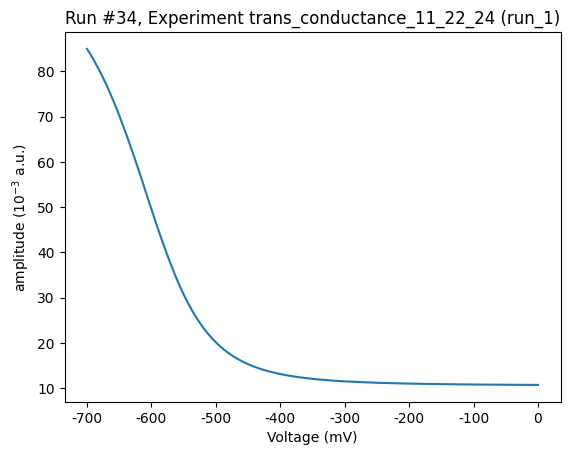

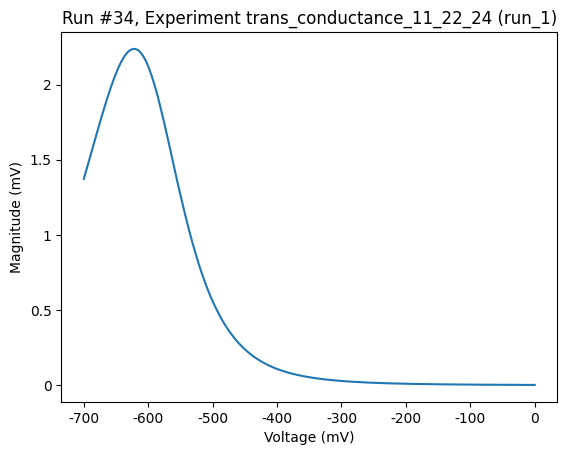

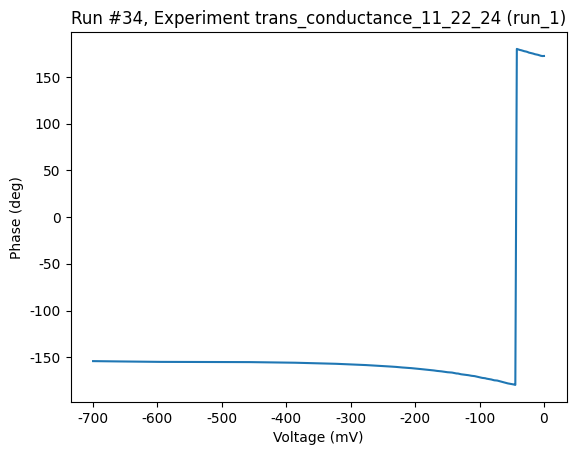

In [11]:
do1d(vg, START, STOP, SAMPLES, INT_TIME, *dep_params, write_period=0.1, do_plot=True, exp=balance_exp, show_progress=True)

In [14]:
paramp(vg)
paramp(vdd)
paramp(dac.ch1.voltage)
dac.display_mode("NORMAL")

In [15]:
qc.Instrument.close_all()
print("hello")

Failed to close acdac, ignored
Traceback (most recent call last):
  File "C:\Users\barreralab\AppData\Local\Programs\Python\Python312\Lib\site-packages\qcodes\instrument\instrument.py", line 198, in close_all
    inst.close()
  File "C:\Users\barreralab\AppData\Local\Programs\Python\Python312\Lib\site-packages\qcodes\instrument\visa.py", line 325, in close
    self.visa_handle.close()
  File "C:\Users\barreralab\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyvisa\resources\resource.py", line 318, in close
    self.visalib.close(self.session)
  File "C:\Users\barreralab\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyvisa\ctwrapper\functions.py", line 637, in close
    return library.viClose(session)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\barreralab\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyvisa\ctwrapper\highlevel.py", line 226, in _return_handler
    return self.handle_return_value(session, ret_value)  # type: ignore
           

hello


## TODO

- [ ] Quantum Designs Cryostatat 6000, Magnetic Field and Temperature params
- [ ] Matplotlib font warnings: clear cache using `rm ~/.cache/matplotlib -rf `
- [ ] Yokogs20 driver: functionality to read current while in voltage source mode and vv 
- [ ] Use dond or measureme instead of annoying measurement object setup  
- [ ] wsl bash version 1 

In [ ]:
print("hello") #not workign